### Install Packages

In [126]:
# pip install missingno
# pip install Jinja2

In [127]:
from lib import check_libs_installed

check_libs_installed()

All Required Installed


### Packages

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from lib import get_file_path

### Import Dataset

In [129]:
df_gps = pd.read_csv(get_file_path('googleplaystore.csv'))
# df_gpsr = pd.read_csv(get_file_path('googleplaystore_user_reviews.csv'))

## Data Exploration & Cleaning

### Data Shape & Structure

In [130]:
df_gps.head().style.background_gradient(cmap='viridis', low=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [131]:
df_gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [132]:
print("Shape of data :", df_gps.shape)
print("Data types : \n", df_gps.dtypes.value_counts())

Shape of data : (10841, 13)
Data types : 
 object     12
float64     1
dtype: int64


In [142]:
df_gps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360,9360,9360.000000,9360,9360,9360,9360,9360,9360,9360,9360,9360,9360
unique,8190,33,NaN,5990,413,19,2,73,6,115,1299,2638,31
top,ROBLOX,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1746,NaN,83,1637,1576,8715,8715,7414,732,319,1415,2059
mean,NaN,NaN,4.191838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Inspection

In [136]:
# 결측값 확인
data_info = pd.DataFrame()
data_info['Column Names'] = df_gps.columns
data_info['Datatype'] = df_gps.dtypes.to_list()
data_info['num_NA'] = data_info['Column Names'].apply(lambda x:df_gps[x].isna().sum())
data_info['%_NA'] = data_info['Column Names'].apply(lambda x: df_gps[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,App,object,0,0.000000
1,Category,object,0,0.000000
2,Rating,float64,1474,0.135965
3,Reviews,object,0,0.000000
4,Size,object,0,0.000000
5,Installs,object,0,0.000000
6,Type,object,1,0.000092
7,Price,object,0,0.000000
8,Content Rating,object,1,0.000092
9,Genres,object,0,0.000000


<AxesSubplot:>

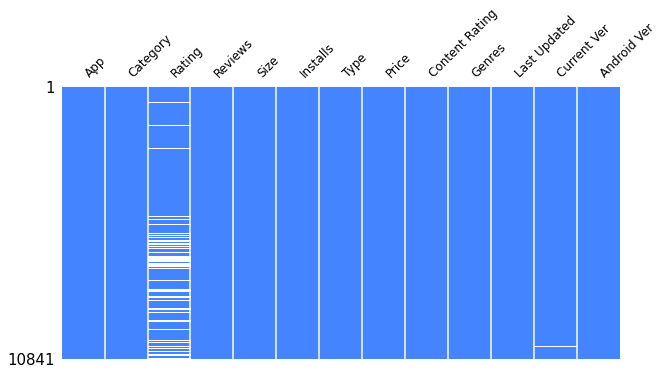

In [137]:
%matplotlib inline
msno.matrix(df_gps, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

In [138]:
# 중복값 확인
data_info = pd.DataFrame()
data_info['Column Names'] = df_gps.columns
data_info['Datatype'] = df_gps.dtypes.to_list()
data_info['Duplicate'] = data_info['Column Names'].apply(lambda x: df_gps[x].duplicated().sum())
data_info

,Column Names,Datatype,Duplicate
0,App,object,1181
1,Category,object,10807
2,Rating,float64,10800
3,Reviews,object,4839
4,Size,object,10379
5,Installs,object,10819
6,Type,object,10837
7,Price,object,10748
8,Content Rating,object,10834
9,Genres,object,10721


- App

In [139]:
print('N Unique: {}, N Duplicated: {}'.format(df_gps.App.nunique(), df_gps.App.size - df_gps.App.nunique()))

duplicated_app = df_gps.App[df_gps.App.duplicated()]
df_gps.App[df_gps.App.duplicated()].head()

N Unique: 9660, N Duplicated: 1181


229    Quick PDF Scanner + OCR FREE
236                             Box
239              Google My Business
256             ZOOM Cloud Meetings
261       join.me - Simple Meetings
Name: App, dtype: object

In [140]:
# 누락값 확인
df_gps.dropna(inplace = True)